In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load training and testing data
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


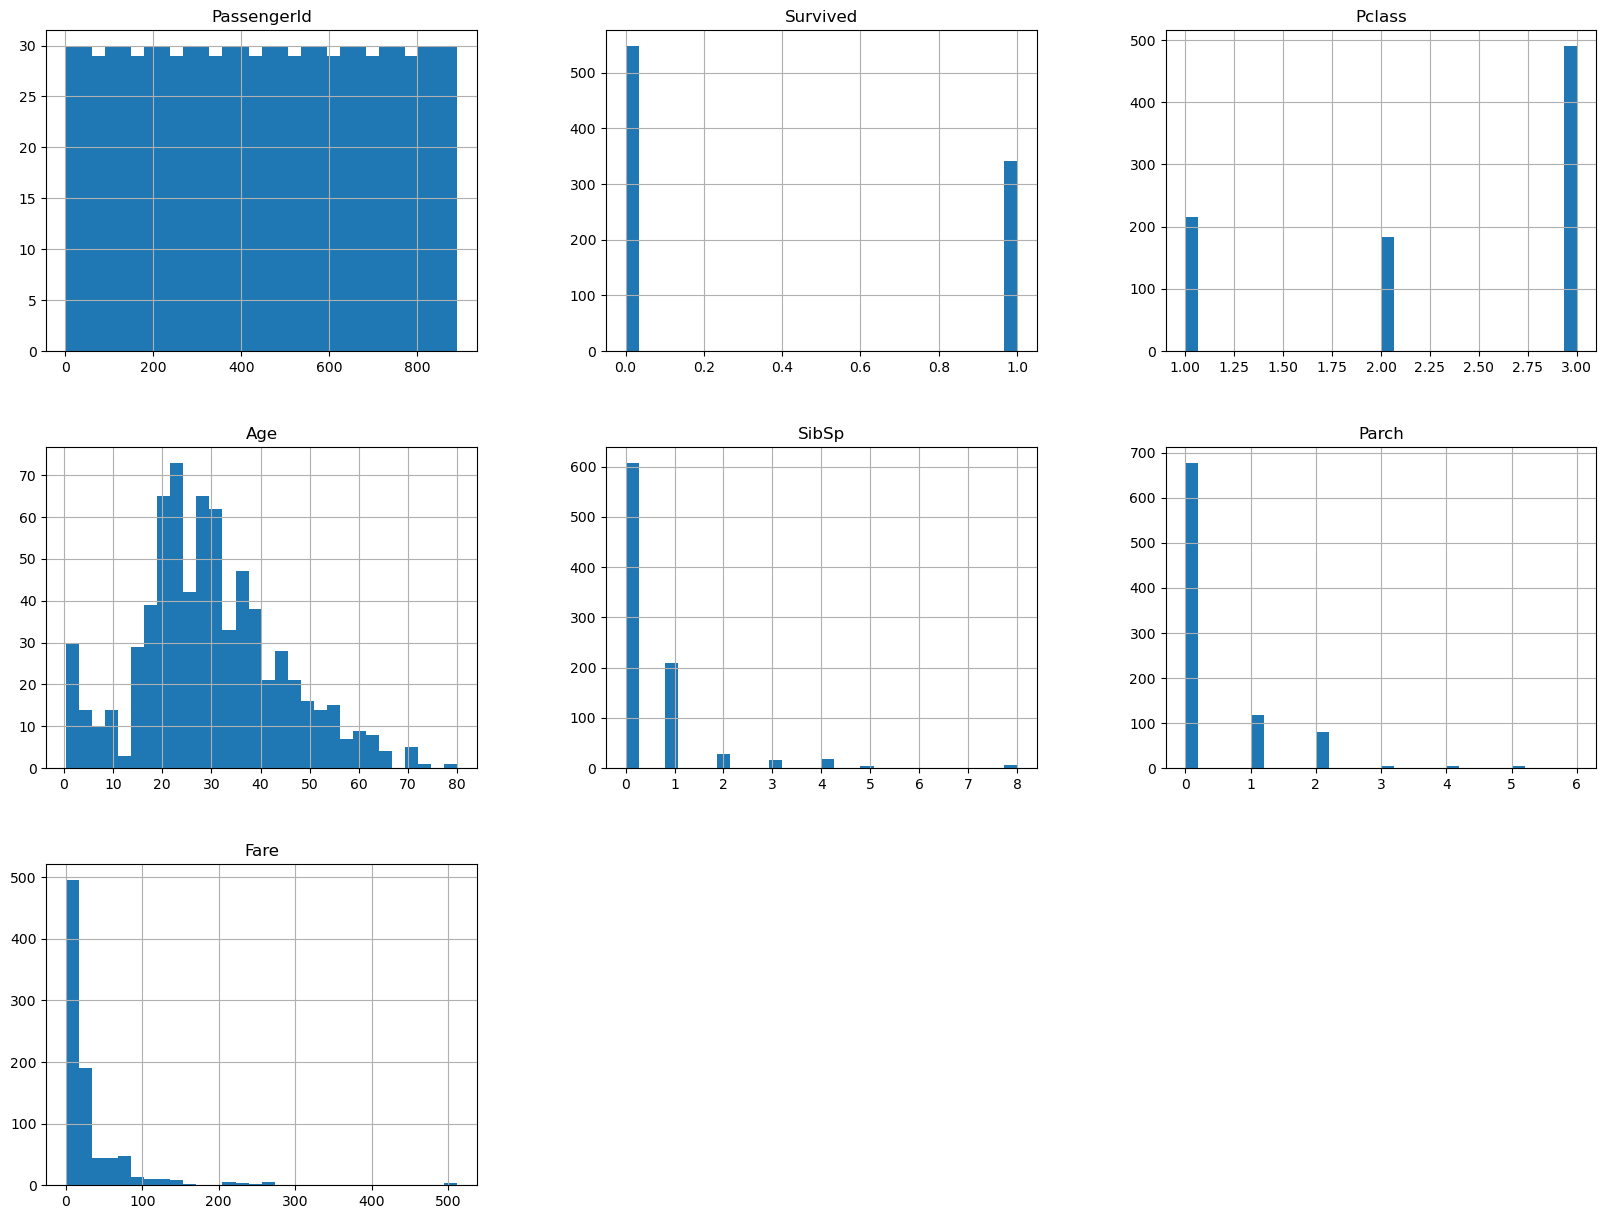

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_data.hist(bins=30, figsize=(20, 15))
plt.show()

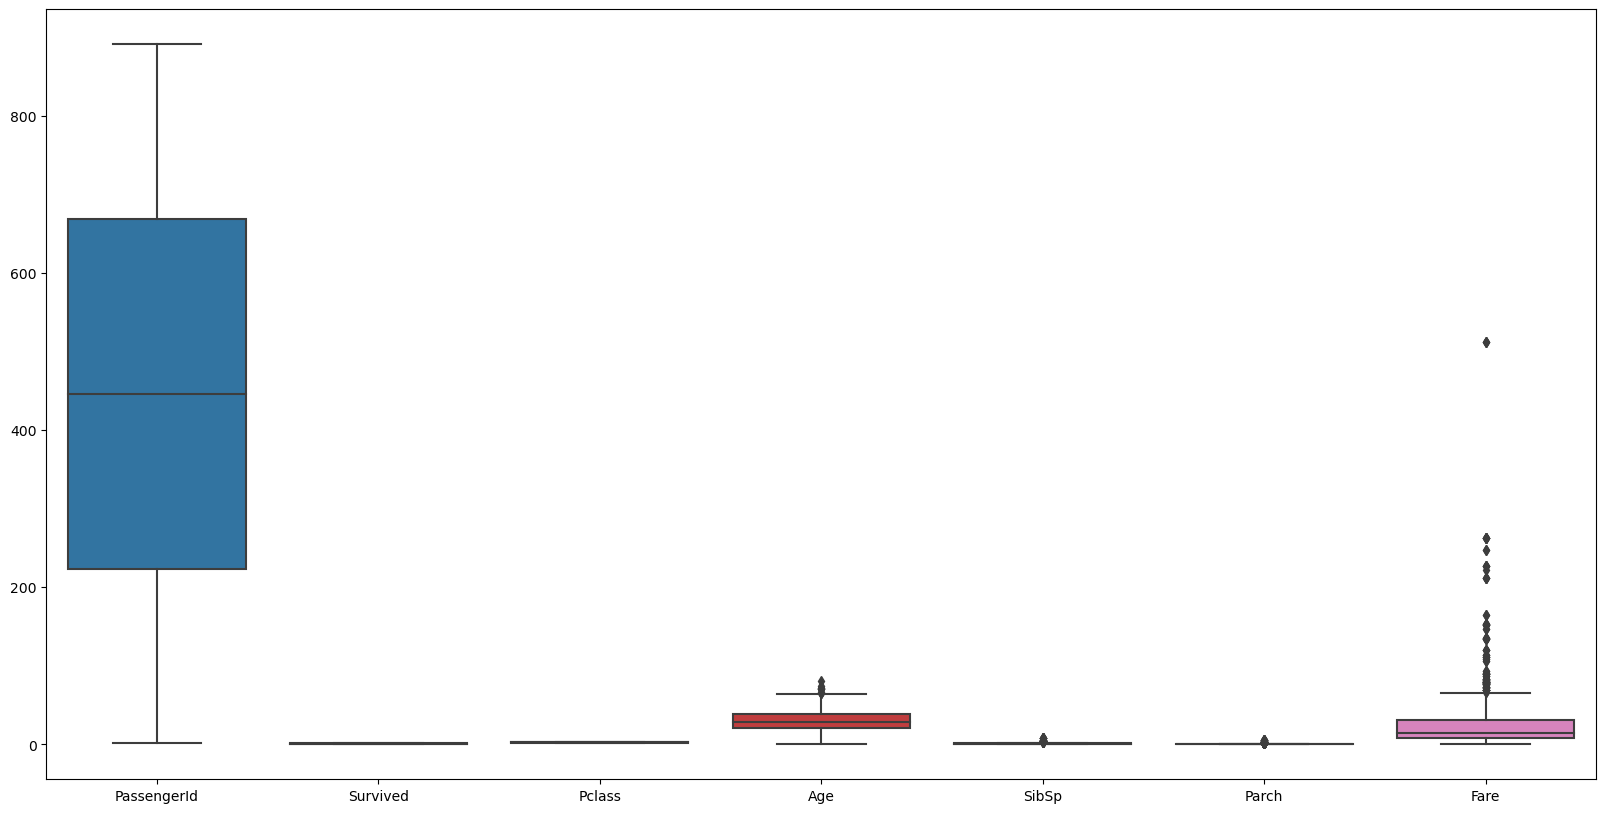

In [10]:
# Box Plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_data.select_dtypes(include=['float64', 'int64']))
plt.show()

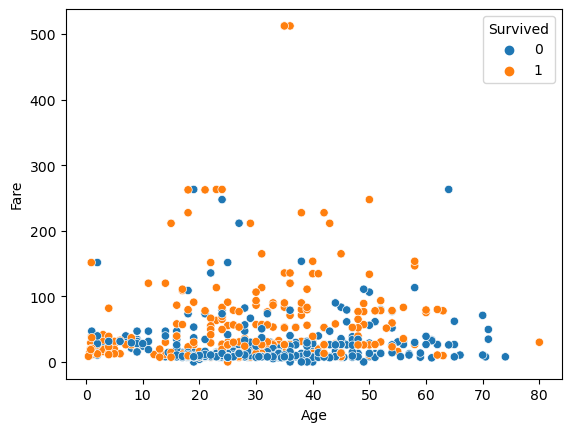

In [11]:
# Scatter Plots
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')
plt.show()


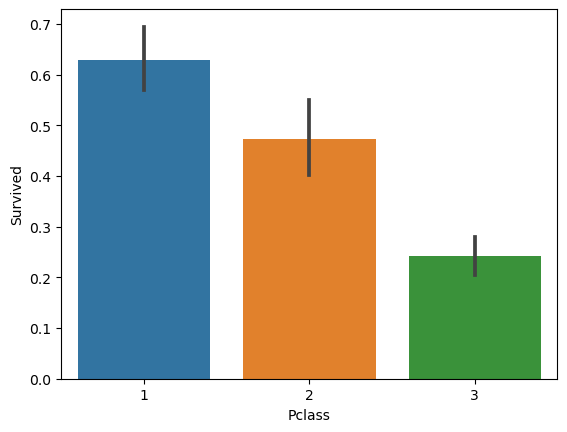

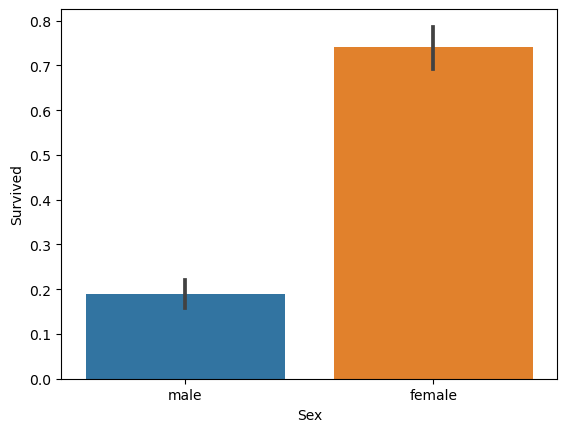

In [12]:
# Bar Plots
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

In [9]:
from sklearn.impute import SimpleImputer
# Impute Age with mean
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [10]:
#impute Fare with mean
imputer_fare = SimpleImputer(strategy='mean')
train_data['Fare'] = imputer_fare.fit_transform(train_data[['Fare']])
test_data['Fare'] = imputer_fare.transform(test_data[['Fare']])

In [11]:
# Fill missing values in 'Embarked' with the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer_embarked.fit_transform(train_data[['Embarked']]).ravel()
test_data['Embarked'] = imputer_embarked.transform(test_data[['Embarked']]).ravel()

In [12]:
# Check the columns in the train and test datasets
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data= pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

In [14]:
from sklearn.model_selection import train_test_split
# Dropping columns that won't be used 
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Define the dataset for LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [21]:
# Define the parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'max_bin': 255,
    'verbose': -1
}

In [22]:
# Train the LightGBM model with early stopping
lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Define the dataset for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.288391	valid's binary_logloss: 0.399402


In [23]:
# Define the parameters for XGBoost
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 6
}

In [24]:
# Train the XGBoost model
xgb_model = xgb.train(xgb_params,
                      dtrain,
                      num_boost_round=100,
                      evals=[(dtest, 'eval')],
                      early_stopping_rounds=10)

[0]	eval-logloss:0.65594
[1]	eval-logloss:0.63388
[2]	eval-logloss:0.61409
[3]	eval-logloss:0.59613
[4]	eval-logloss:0.57972
[5]	eval-logloss:0.56560
[6]	eval-logloss:0.55263
[7]	eval-logloss:0.54121
[8]	eval-logloss:0.53049
[9]	eval-logloss:0.52186
[10]	eval-logloss:0.51254
[11]	eval-logloss:0.50354
[12]	eval-logloss:0.49630
[13]	eval-logloss:0.48962
[14]	eval-logloss:0.48343
[15]	eval-logloss:0.47771
[16]	eval-logloss:0.47327
[17]	eval-logloss:0.46864
[18]	eval-logloss:0.46383
[19]	eval-logloss:0.45909
[20]	eval-logloss:0.45636
[21]	eval-logloss:0.45276
[22]	eval-logloss:0.44906
[23]	eval-logloss:0.44620
[24]	eval-logloss:0.44388
[25]	eval-logloss:0.44058
[26]	eval-logloss:0.43896
[27]	eval-logloss:0.43633
[28]	eval-logloss:0.43490
[29]	eval-logloss:0.43345
[30]	eval-logloss:0.43171
[31]	eval-logloss:0.43052
[32]	eval-logloss:0.42927
[33]	eval-logloss:0.42782
[34]	eval-logloss:0.42705
[35]	eval-logloss:0.42597
[36]	eval-logloss:0.42509
[37]	eval-logloss:0.42402
[38]	eval-logloss:0.42

In [25]:
# Predictions for LightGBM
lgb_preds = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
lgb_preds = [1 if x >= 0.5 else 0 for x in lgb_preds]

# Predictions for XGBoost
xgb_preds = xgb_model.predict(dtest)
xgb_preds = [1 if x >= 0.5 else 0 for x in xgb_preds]


In [26]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_preds)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_preds)


In [27]:
print(f"LightGBM - Accuracy: {lgb_accuracy}, Precision: {lgb_precision}, Recall: {lgb_recall}, F1-score: {lgb_f1}")
print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-score: {xgb_f1}")


LightGBM - Accuracy: 0.8268156424581006, Precision: 0.8028169014084507, Recall: 0.7702702702702703, F1-score: 0.7862068965517242
XGBoost - Accuracy: 0.8268156424581006, Precision: 0.8524590163934426, Recall: 0.7027027027027027, F1-score: 0.7703703703703704


In [28]:
# Plotting the comparative analysis
import matplotlib.pyplot as plt
import numpy as np


In [29]:
# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_scores = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

In [30]:
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

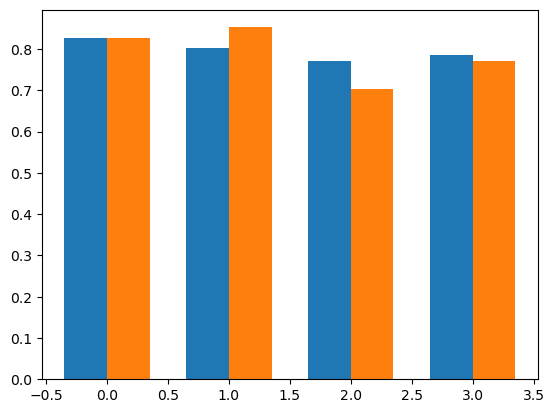

In [31]:
# Plotting the comparative analysis
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost')


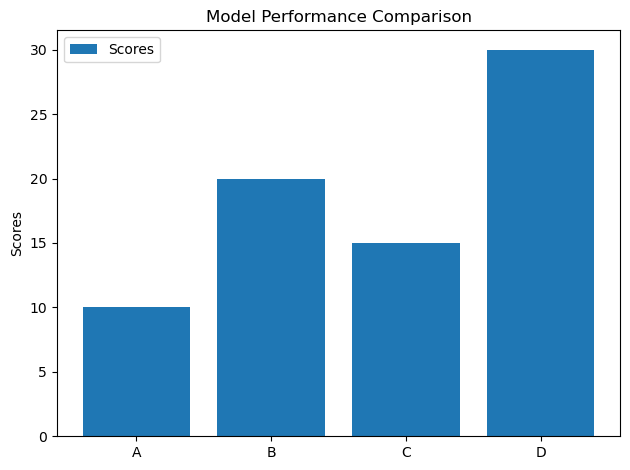

In [36]:
# Add some text for labels, title and custom x-axis tick labels, etc.
x = [1, 2, 3, 4]
metrics = ['A', 'B', 'C', 'D']
scores = [10, 20, 15, 30]

fig, ax = plt.subplots()
ax.bar(x, scores)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(['Scores'])

fig.tight_layout()
plt.show()